# 모델 학습 및 테스트 용 노트북

### 현업에서 실제로 사용할 수 있도록 간략화

### 사용법

#### 1) 경로 설정
- 절대 경로 혹은 상대경로로 설정

#### 2) 최초 학습이거나 새로운 데이터를 학습시키고자 할 경우
- 1번 -> 2번 -> 3번 -> 4번 순으로 모두 구동

#### 3) 저장된 모델을 사용하여 바로 검사하고자 할 경우
- 1번 -> 2번 -> 4번 순으로 실행(3번 학습 과정은 제외)


## 0. 경로 설정

In [1]:
# 최상위 폴더 경로
folder_path = 'C:\\Users\\박인창\\OneDrive - 한양대학교\\1 제조AI 공모전\\KAMP_NaeBIS'

In [2]:
# 데이터가 담긴 폴더 경로 및 데이터명
data_path = 'data/'
data_name = '경진대회용 사출성형기 데이터셋_labeled.csv'

In [3]:
# 저장된 모델의 경로
saved_model_path = 'saved_model/'

## 1. 외부 class 및 함수 로딩

In [4]:
# Class 정보를 불러오기 위해 필요
# 가장 상위 파일의 절대 경로 혹은 상대경로 이정
import sys
sys.path.append(folder_path)
print(sys.path)

['C:\\Users\\박인창\\OneDrive - 한양대학교\\1 제조AI 공모전\\KAMP_NaeBIS\\KAMP_모델코드', 'C:\\ProgramData\\anaconda3\\python38.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\ProgramData\\anaconda3\\lib\\site-packages', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\박인창\\.ipython', 'C:\\Users\\박인창\\OneDrive - 한양대학교\\1 제조AI 공모전\\KAMP_NaeBIS']


In [5]:
from utils.tools import *
from utils.model import *
from utils.Preprocessor import Preprocessor

## 2. 데이터 로드 및 전처리

In [6]:
train_loader, val_loader, test_loader, scaler, labels, w_size, z_size, window_size, col_names, cn7_Y  = Preprocessor(data_path+data_name).preprocessing_4_train()

Preprocessor is Operating


C:\ProgramData\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 3. Training
- 처음 학습하거나 새로운 데이터를 학습시켜야할 경우 사용
- 학습 후 saved_model에 모델 가중치 저장

In [7]:
device = get_default_device()
model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [8]:
history = training(80,model,train_loader,val_loader)

Epoch [0], val_loss1: 0.0104, val_loss2: 0.0101
Epoch [1], val_loss1: 0.0098, val_loss2: -0.0014
Epoch [2], val_loss1: 0.0097, val_loss2: -0.0046
Epoch [3], val_loss1: 0.0098, val_loss2: -0.0062
Epoch [4], val_loss1: 0.0099, val_loss2: -0.0071
Epoch [5], val_loss1: 0.0101, val_loss2: -0.0077
Epoch [6], val_loss1: 0.0102, val_loss2: -0.0082
Epoch [7], val_loss1: 0.0103, val_loss2: -0.0085
Epoch [8], val_loss1: 0.0104, val_loss2: -0.0088
Epoch [9], val_loss1: 0.0105, val_loss2: -0.0090
Epoch [10], val_loss1: 0.0105, val_loss2: -0.0092
Epoch [11], val_loss1: 0.0106, val_loss2: -0.0094
Epoch [12], val_loss1: 0.0106, val_loss2: -0.0095
Epoch [13], val_loss1: 0.0107, val_loss2: -0.0096
Epoch [14], val_loss1: 0.0107, val_loss2: -0.0097
Epoch [15], val_loss1: 0.0108, val_loss2: -0.0099
Epoch [16], val_loss1: 0.0108, val_loss2: -0.0099
Epoch [17], val_loss1: 0.0108, val_loss2: -0.0100
Epoch [18], val_loss1: 0.0108, val_loss2: -0.0101
Epoch [19], val_loss1: 0.0108, val_loss2: -0.0101
Epoch [20],

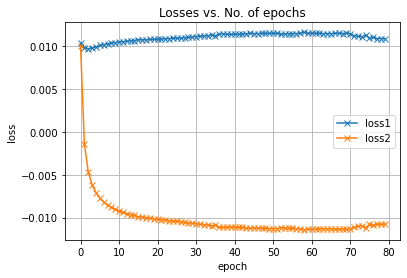

In [9]:
plot_history(history)

#### 모델 저장

In [10]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, saved_model_path+"AI_model.pth")

## 4. Testing

#### 모델 로딩

In [11]:
checkpoint = torch.load(saved_model_path+"AI_model.pth")

device = get_default_device()
model = UsadModel(w_size, z_size)
model = to_device(model,device)

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

### 검사 결과

#### 해석 가이드
- 1) time : 이상이 감지된 시간(데이터 순번)
- 2) 이상 보고 : 이상이 감지된 각 변수가 정상 범주와 어느 정도 차이가 있는지를 표시

################################# 이상 감지 #################################

time = 630
Average_Back_Pressure가 정상 범위보다 -39.37044616843911 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -18.629535693383872 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -14.437455856241257 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -14.48422359339932 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -15.036929607391329 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.477234461934643 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.875234770806884 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5886788895865038 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.66244341570291 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.122329594034643 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -16.241075607805854 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.23085262774861803 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -25.429774301664285 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.1468292655

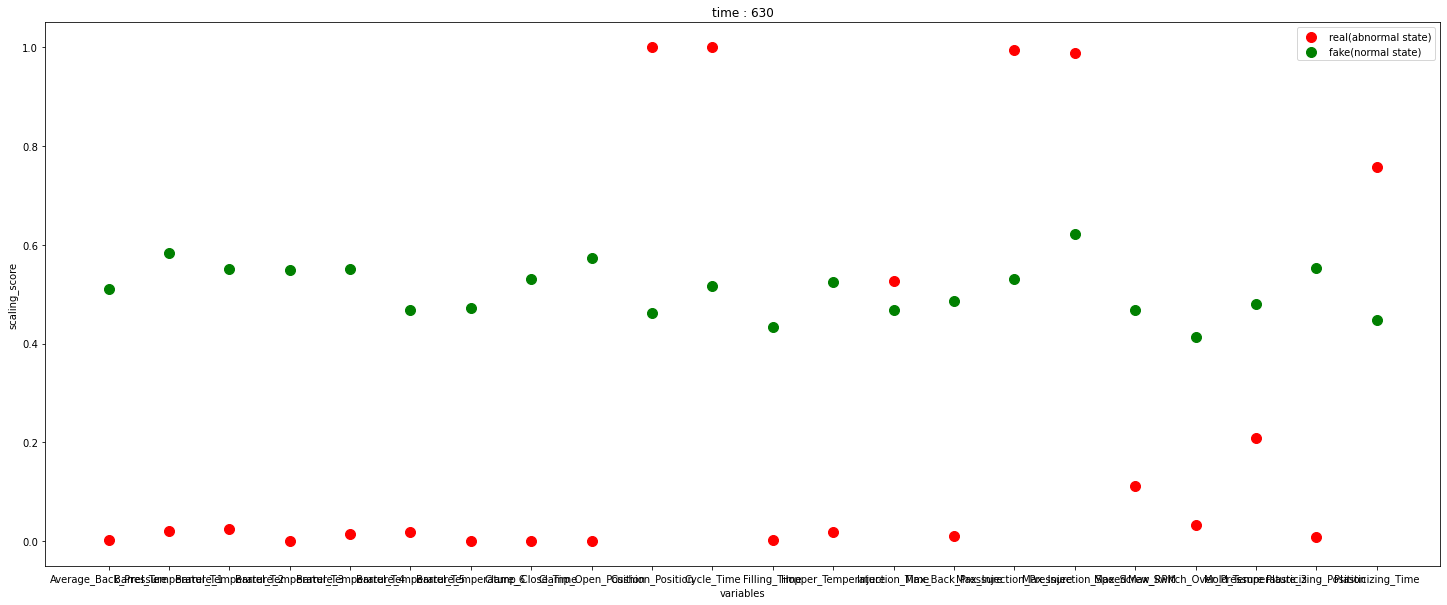


################################# 이상 감지 #################################

time = 631
Average_Back_Pressure가 정상 범위보다 -39.47044655493927 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -18.729526528174176 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -14.537446694448562 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -14.18423579975044 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -15.036929607391329 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.477234461934643 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.375234753830483 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5786791374403117 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.6224426631604274 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.1123296035926638 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -16.141073283880516 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.23085262774861803 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -25.62977318490415 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.3468421

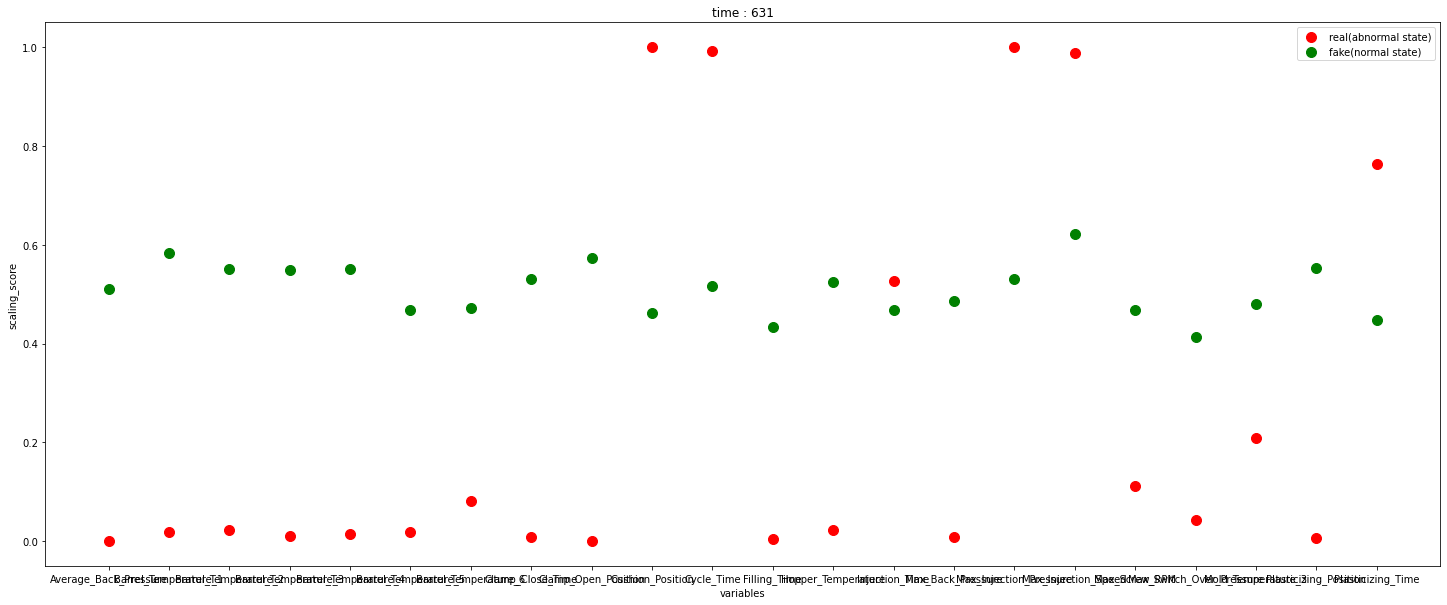


################################# 이상 감지 #################################

time = 636
Average_Back_Pressure가 정상 범위보다 -39.37044616843911 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -18.82953263739836 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -14.237458864226909 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -14.084229697748924 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -14.036929562687845 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.377228336833696 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.375234753830483 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5786791374403117 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.632444739719631 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.122329594034643 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -16.241075607805854 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.22085330076947685 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -25.729773548300532 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.14682926

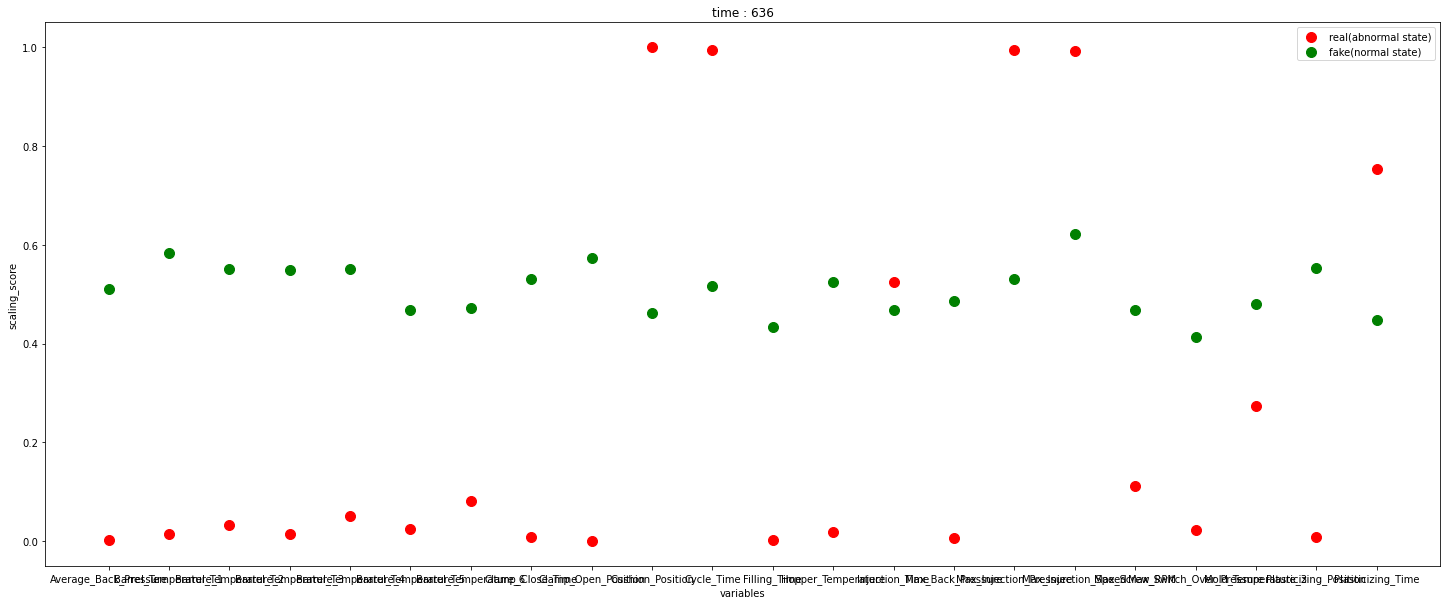


################################# 이상 감지 #################################

time = 697
Average_Back_Pressure가 정상 범위보다 -39.47044655493927 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -19.029529581412845 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -14.337449753656955 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -14.18423579975044 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -14.936938740313025 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.377228336833696 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.4752408927696763 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5786791374403117 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.602445735314859 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.122329594034643 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -16.041074846364097 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.23085262774861803 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -25.62977318490415 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.14682926

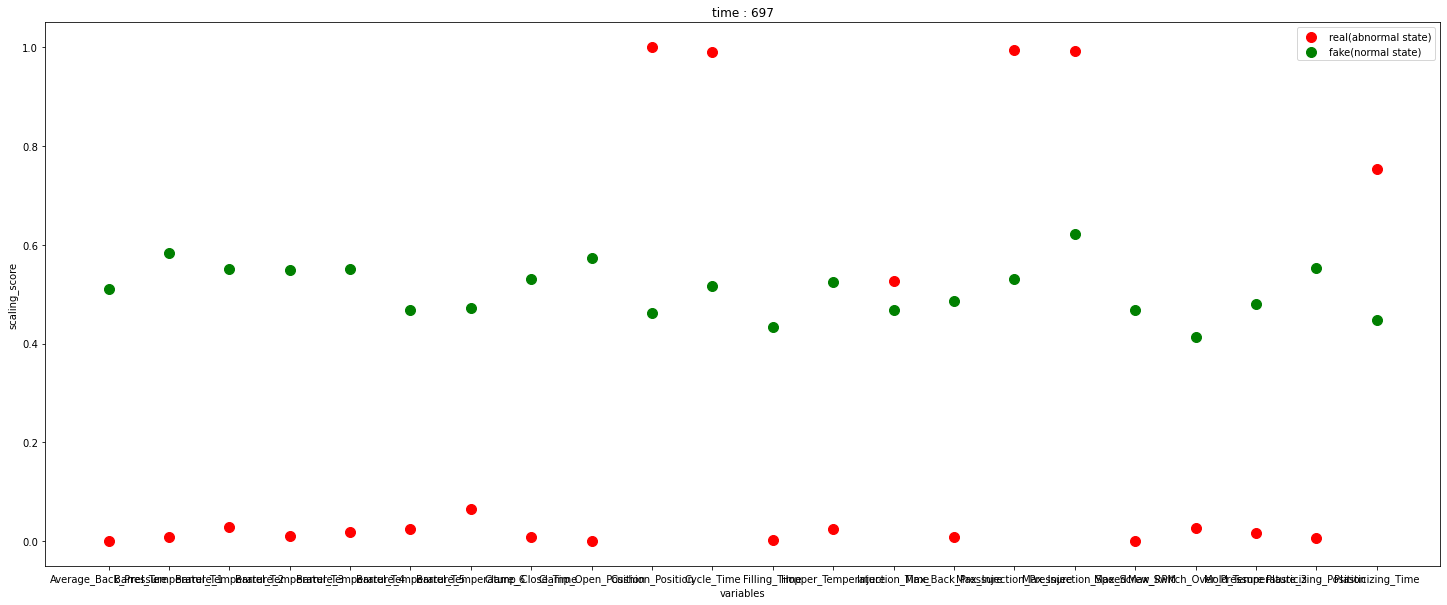


################################# 이상 감지 #################################

time = 748
Average_Back_Pressure가 정상 범위보다 -39.570445985087524 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -19.129535690637027 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -14.037446659058304 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -14.18423579975044 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -15.136935703456373 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.477234461934643 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.2752439310268358 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5886788895865038 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.632444739719631 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.122329594034643 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -15.941072522438759 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.22085330076947685 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -26.029772794936783 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.146829

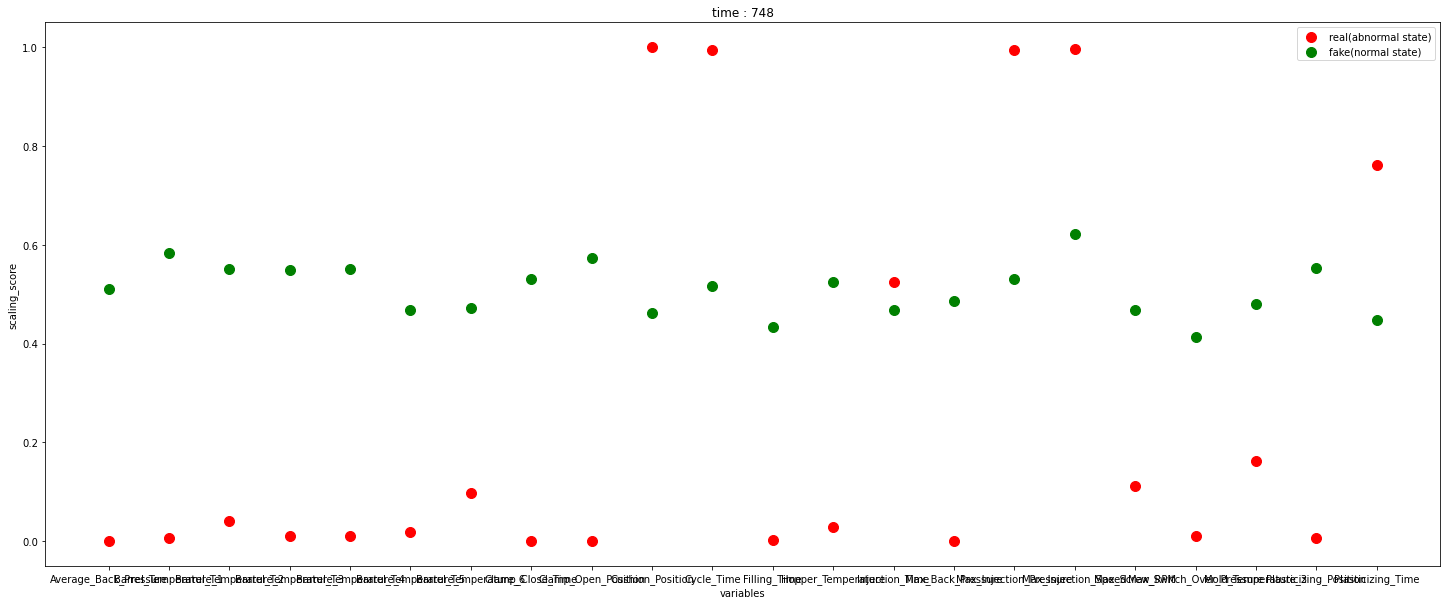


################################# 이상 감지 #################################

time = 883
Average_Back_Pressure가 정상 범위보다 -39.37044616843911 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -18.82953263739836 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -14.137452812865348 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -14.084229697748924 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -14.636935733258696 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.377228336833696 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.375234753830483 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5686789076934247 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.632444739719631 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.122329594034643 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -16.641073304071355 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.22085330076947685 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -25.329773963180777 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.24683656

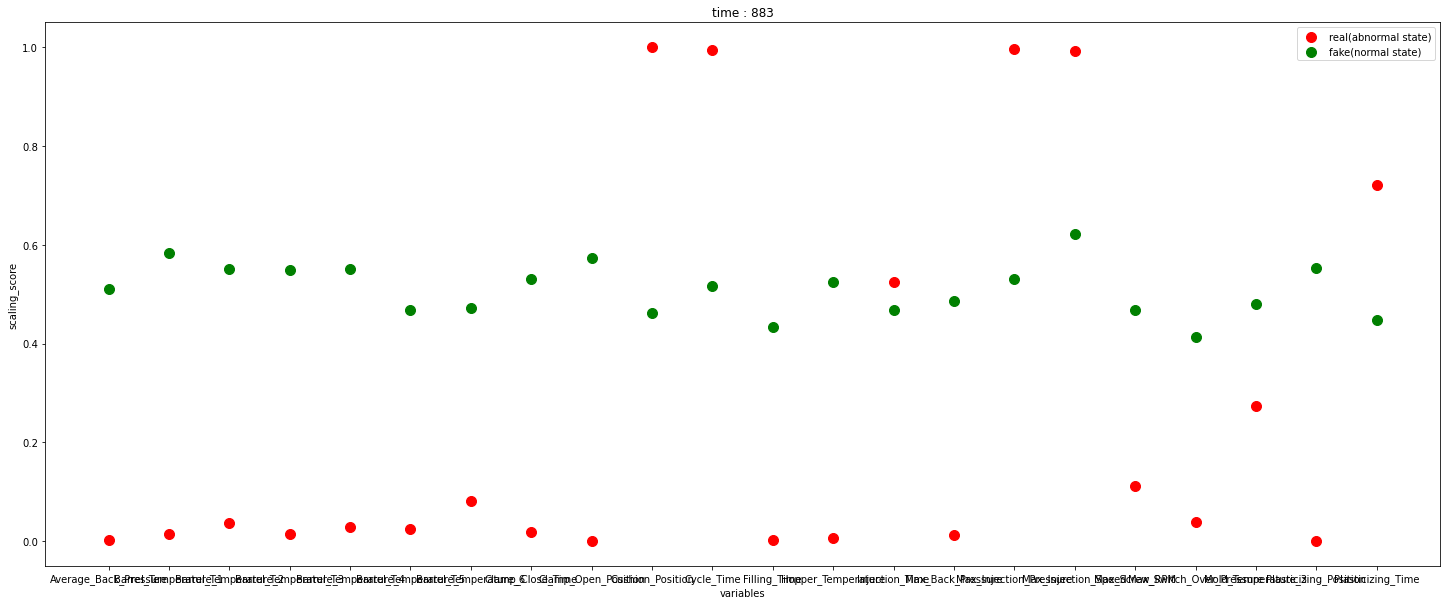


################################# 이상 감지 #################################

time = 884
Average_Back_Pressure가 정상 범위보다 -39.37044616843911 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -18.22952653092102 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -14.137452812865348 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -14.18423579975044 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -15.136935703456373 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.277237486159606 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.7752439252789998 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5686789076934247 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.632444739719631 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.122329594034643 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -16.741075590627382 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.22085330076947685 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -25.529772796594887 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.34684218

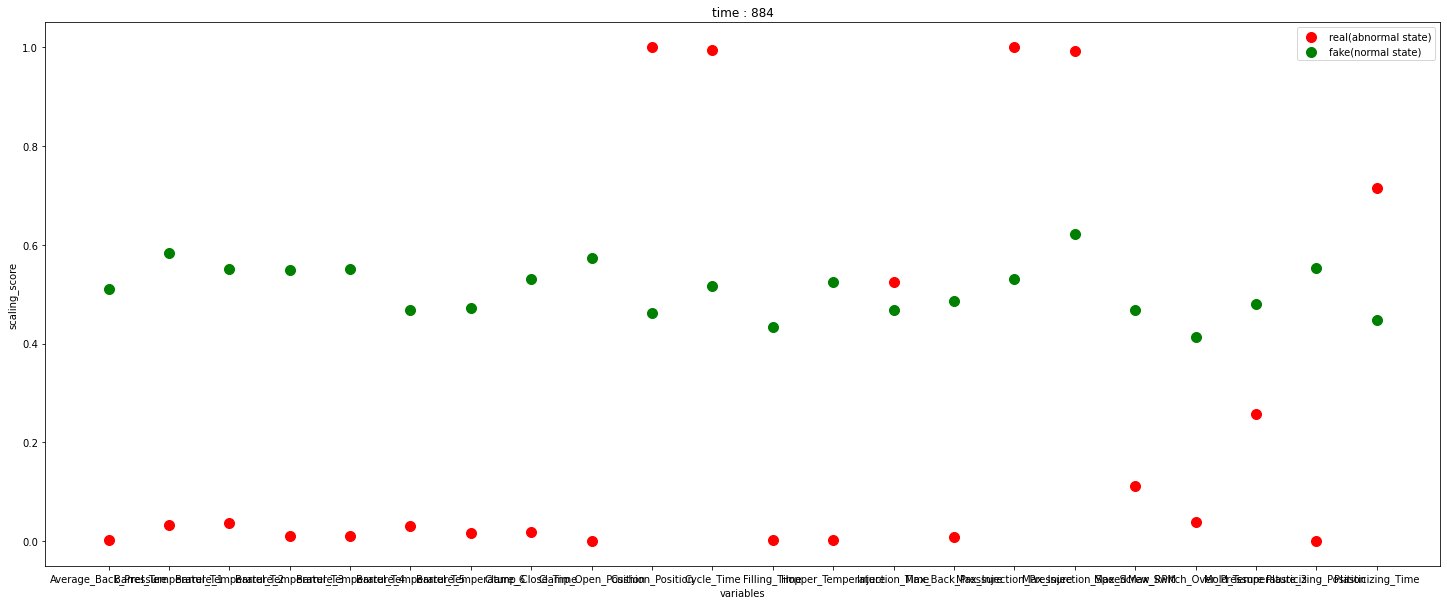


################################# 이상 감지 #################################

time = 887
Average_Back_Pressure가 정상 범위보다 -39.47044655493927 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -19.029529581412845 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -14.537446694448562 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -14.284226645574137 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -13.836932703852625 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.577240556115697 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.4752408927696763 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5686789076934247 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.632444739719631 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.122329594034643 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -16.841074065513112 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.22085330076947685 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -25.929774318690836 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.246836

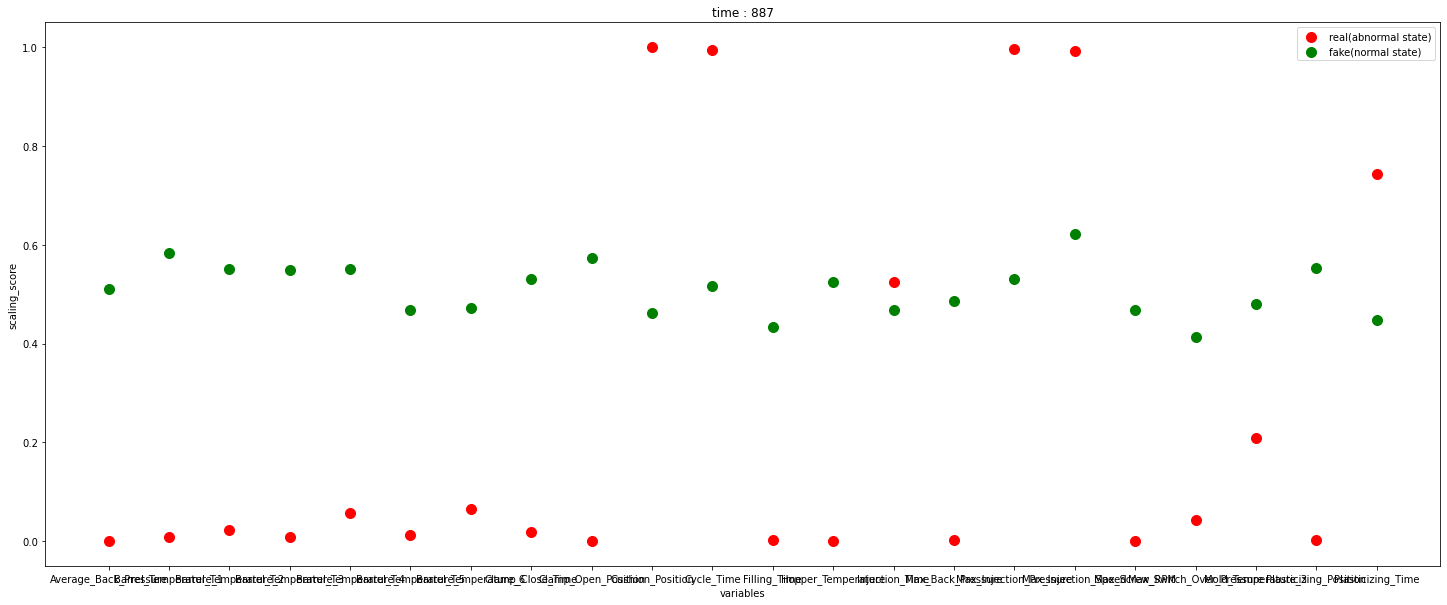


################################# 이상 감지 #################################

time = 935
Average_Back_Pressure가 정상 범위보다 -39.37044616843911 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -18.729526528174176 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -13.937455872073741 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -14.284226645574137 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -15.436938762664767 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.177231422898444 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.4752408927696763 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5686789076934247 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.6424468162788344 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.122329594034643 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -16.341074075217726 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.22085330076947685 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -25.529772796594887 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.24683

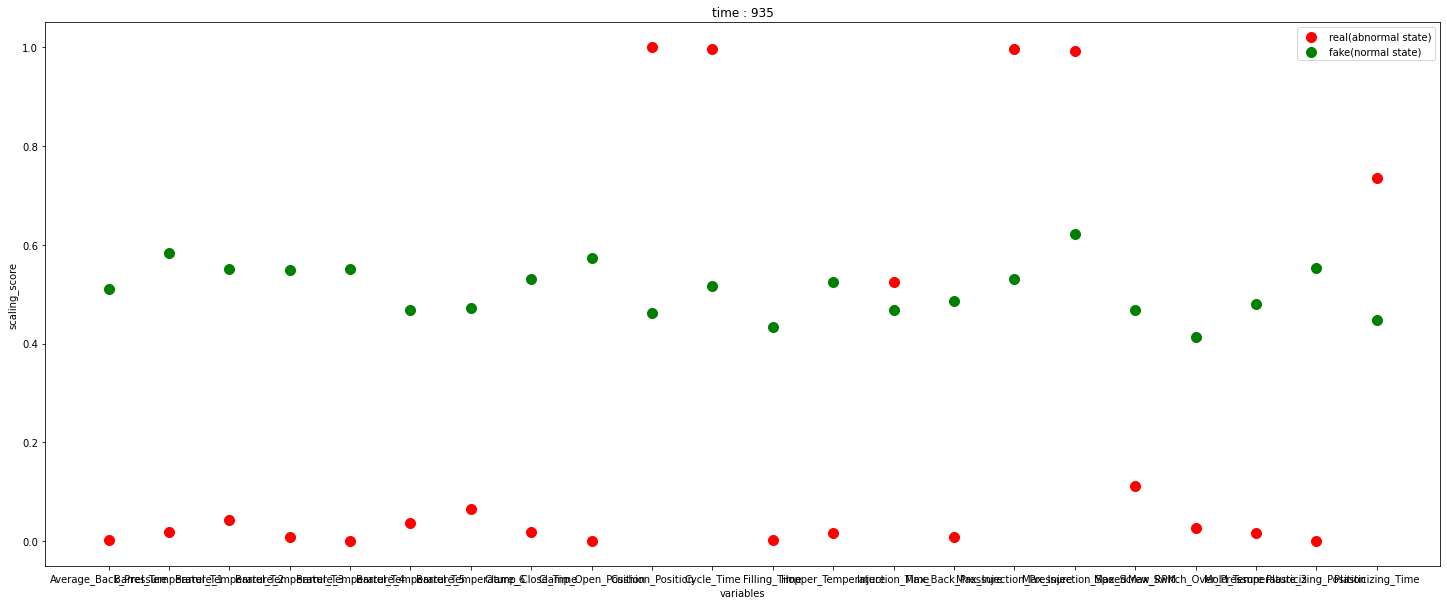


################################# 이상 감지 #################################

time = 955
Average_Back_Pressure가 정상 범위보다 -39.47044655493927 만큼 벗어났습니다.
Barrel_Temperature_1가 정상 범위보다 -18.82953263739836 만큼 벗어났습니다.
Barrel_Temperature_2가 정상 범위보다 -13.63745277747509 만큼 벗어났습니다.
Barrel_Temperature_3가 정상 범위보다 -13.984223595747409 만큼 벗어났습니다.
Barrel_Temperature_4가 정상 범위보다 -14.036929562687845 만큼 벗어났습니다.
Barrel_Temperature_5가 정상 범위보다 -7.277237486159606 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -2.4752408927696763 만큼 벗어났습니다.
Clamp_Close_Time가 정상 범위보다 -0.5686789076934247 만큼 벗어났습니다.
Clamp_Open_Position가 정상 범위보다 -331.10433007265783 만큼 벗어났습니다.
Cushion_Position가 정상 범위보다 0.8666640034934971 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.6424468162788344 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 -2.132329584476622 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -16.341074075217726 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.21085301296329817 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 -25.62977318490415 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 13.04683888

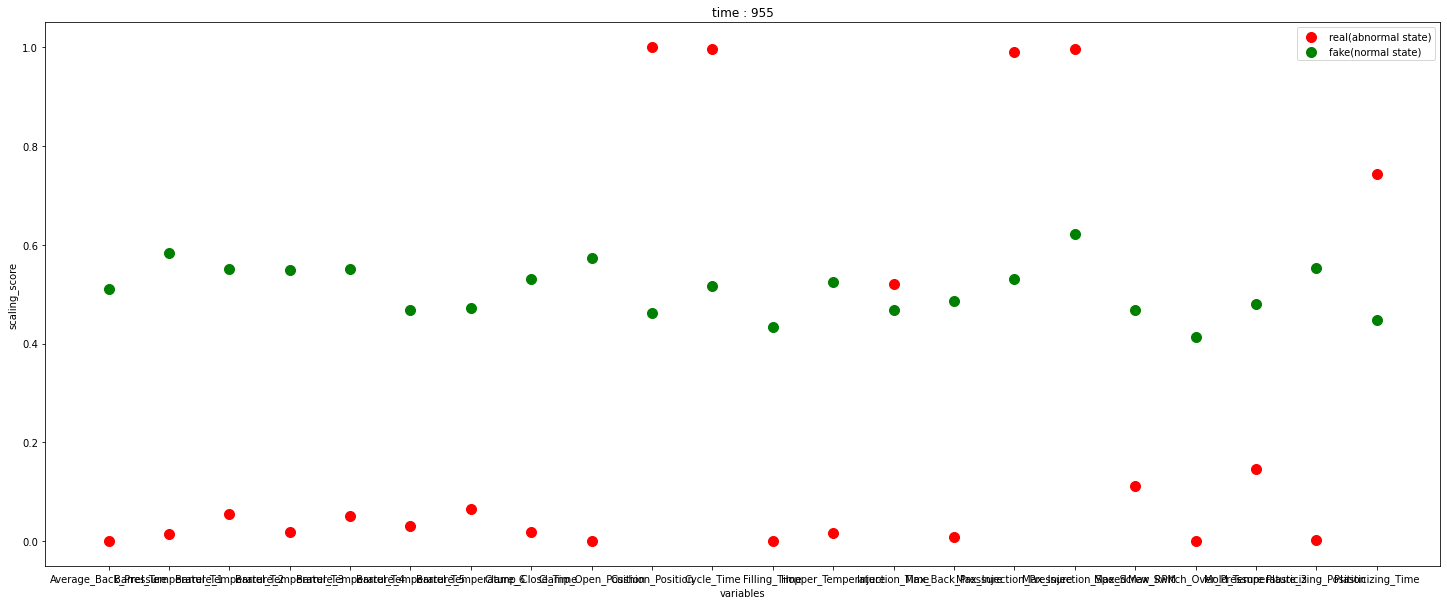


################################# 이상 감지 #################################

time = 979
Average_Back_Pressure가 정상 범위보다 30.70275271033629 만큼 벗어났습니다.
Barrel_Temperature_6가 정상 범위보다 -0.9161150593690763 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.5149498570306434 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 0.43959669763791 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 0.4295464496171135 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 37.91488771998103 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -6.456505702097267 만큼 벗어났습니다.
Max_Screw_RPM가 정상 범위보다 0.3905768310858093 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 2.060091111883594 만큼 벗어났습니다.


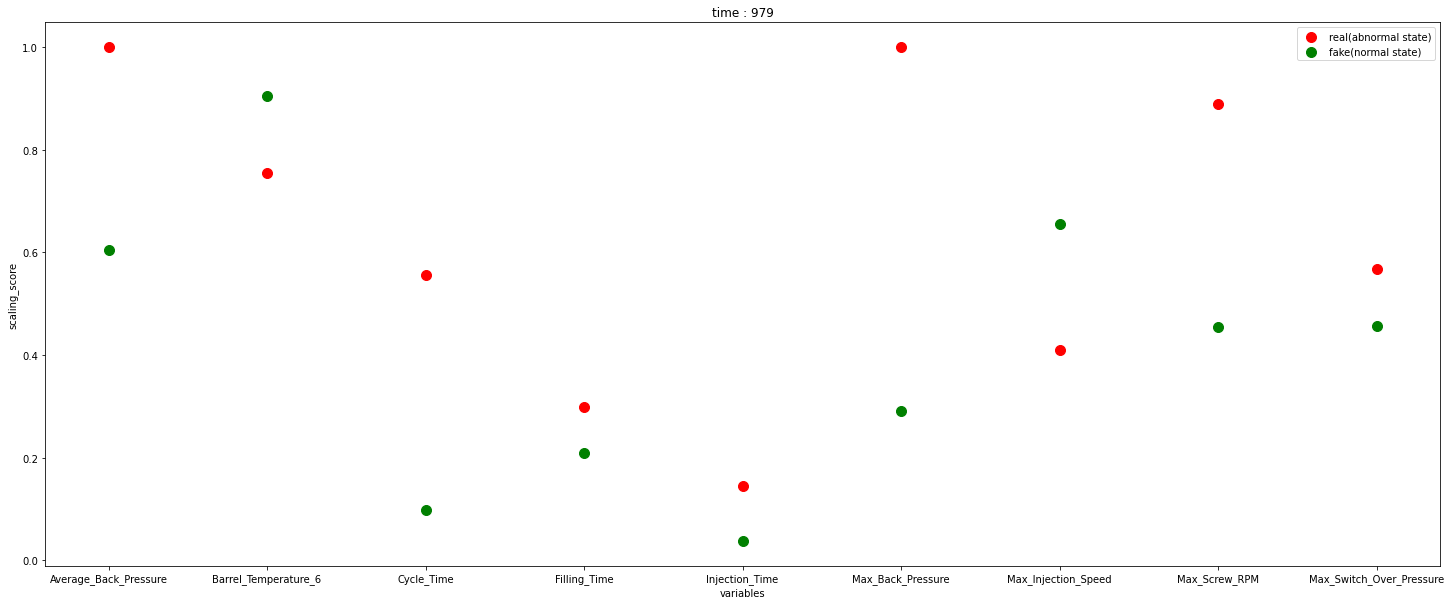


################################# 이상 감지 #################################

time = 1701
Cushion_Position가 정상 범위보다 0.2036569592798969 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 3.848001015068135 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -2.8539376332737447 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 3.856281386742765 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 5.650098772839954 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -17.21125631370068 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 9.995513064598072 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.8538726126536176 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.9307749778786842 만큼 벗어났습니다.


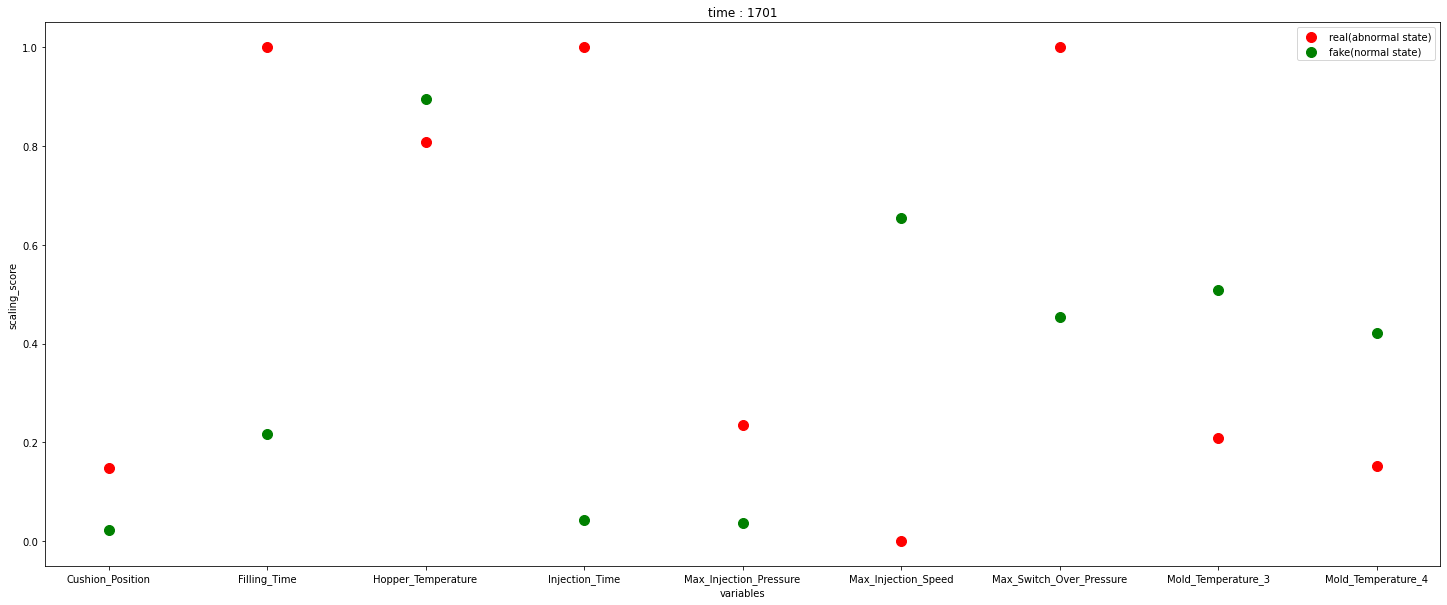


################################# 이상 감지 #################################

time = 1702
Average_Back_Pressure가 정상 범위보다 27.03893493096198 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.9720530894816193 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 1.3367898578300768 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -3.730602426815935 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 1.3183133208962161 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 34.59206318073495 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 3.2987274820208086 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -10.355636704565306 만큼 벗어났습니다.
Max_Screw_RPM가 정상 범위보다 0.3906409896342211 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 5.9634101292199375 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.6598186945864768 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.818253108937995 만큼 벗어났습니다.


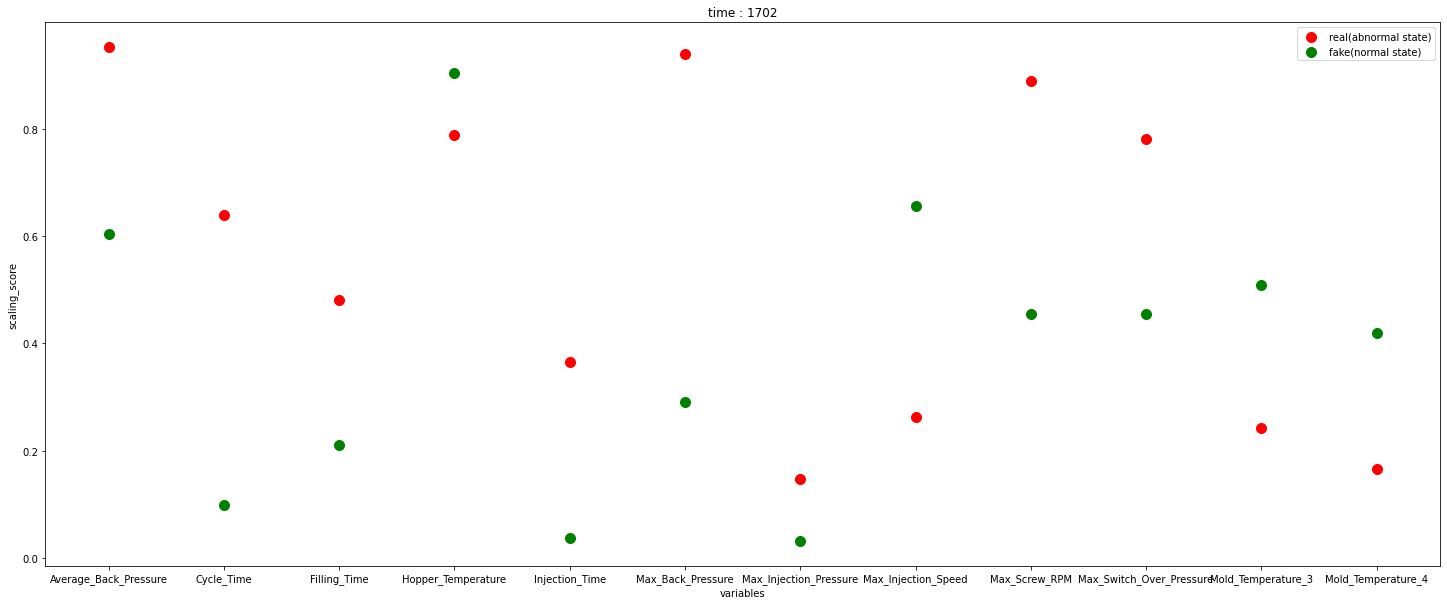


################################# 이상 감지 #################################

time = 1703
Cycle_Time가 정상 범위보다 2.887662272199833 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 1.9236315928884054 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -2.7716787391641446 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 1.9411598396776597 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 5.769825523959298 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 3.8471090544398407 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -10.58329488952267 만큼 벗어났습니다.
Max_Screw_RPM가 정상 범위보다 -0.2098022620498341 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 7.514992512795288 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.7505437391376688 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.838201016076198 만큼 벗어났습니다.


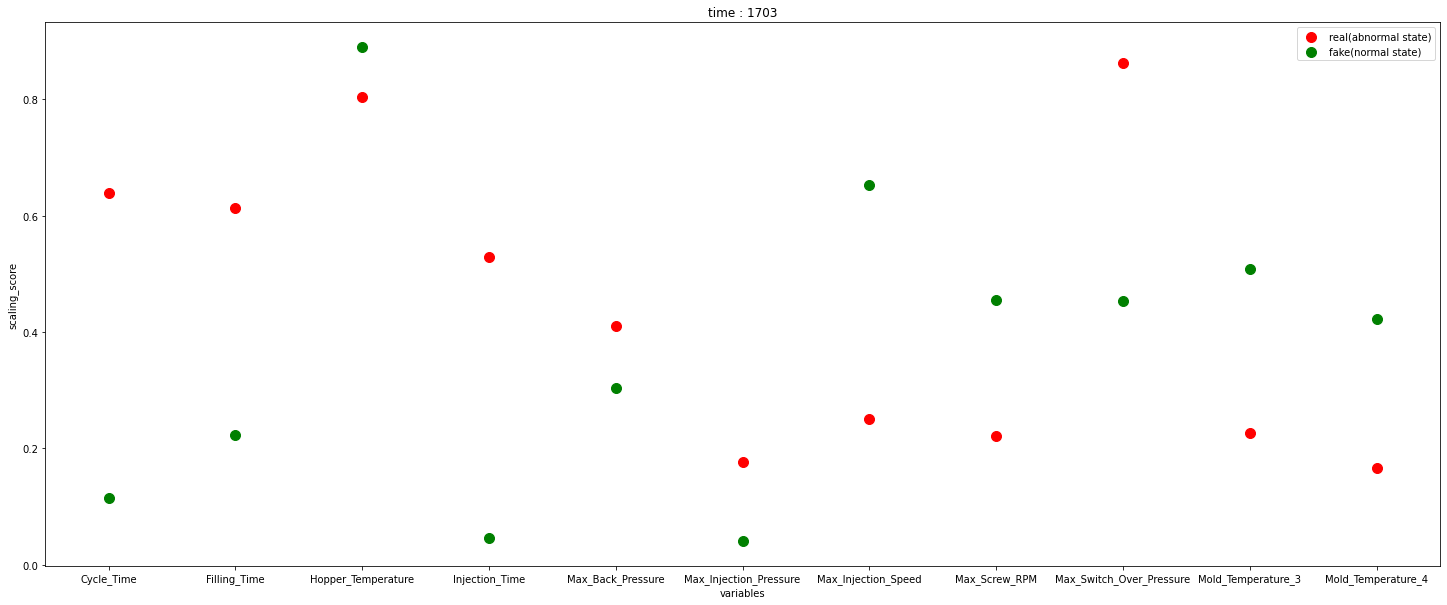


################################# 이상 감지 #################################

time = 1707
Cushion_Position가 정상 범위보다 0.2036569592798969 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 3.848001015068135 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -2.8539376332737447 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 3.856281386742765 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 5.650098772839954 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -17.21125631370068 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 9.995513064598072 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.8538726126536176 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.9307749778786842 만큼 벗어났습니다.


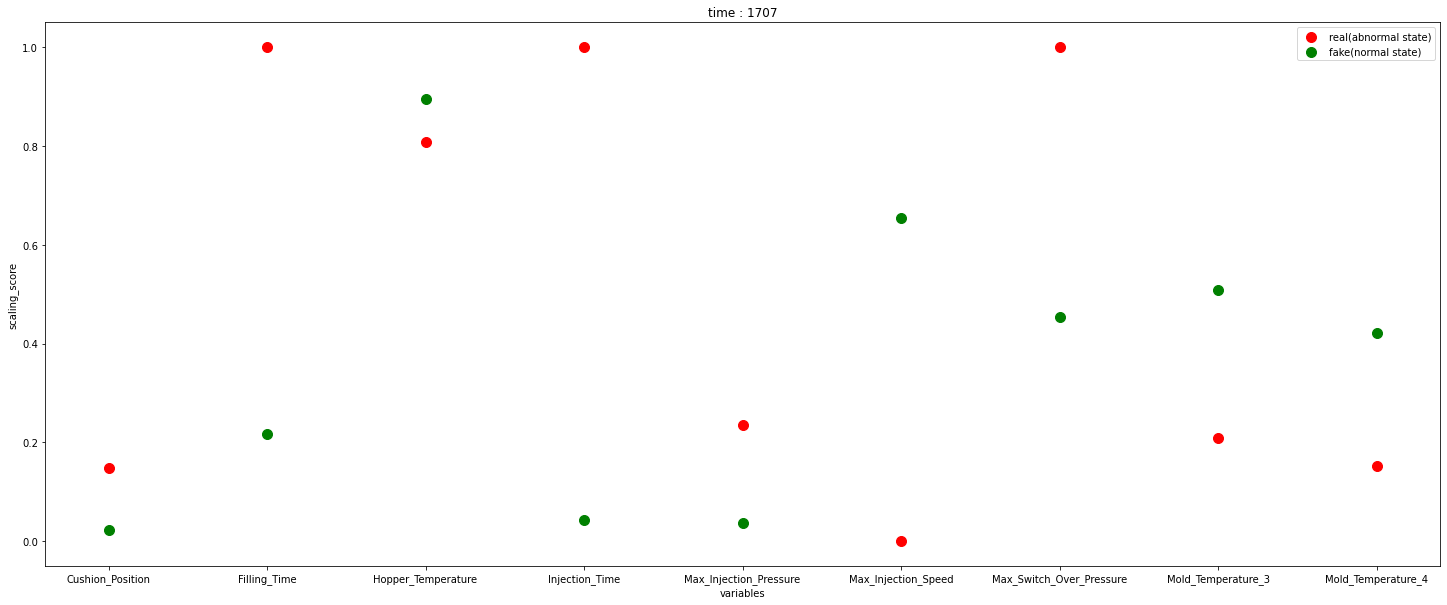


################################# 이상 감지 #################################

time = 1708
Average_Back_Pressure가 정상 범위보다 27.03893493096198 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.9720530894816193 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 1.3367898578300768 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -3.730602426815935 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 1.3183133208962161 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 34.59206318073495 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 3.2987274820208086 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -10.355636704565306 만큼 벗어났습니다.
Max_Screw_RPM가 정상 범위보다 0.3906409896342211 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 5.9634101292199375 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.6598186945864768 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.818253108937995 만큼 벗어났습니다.


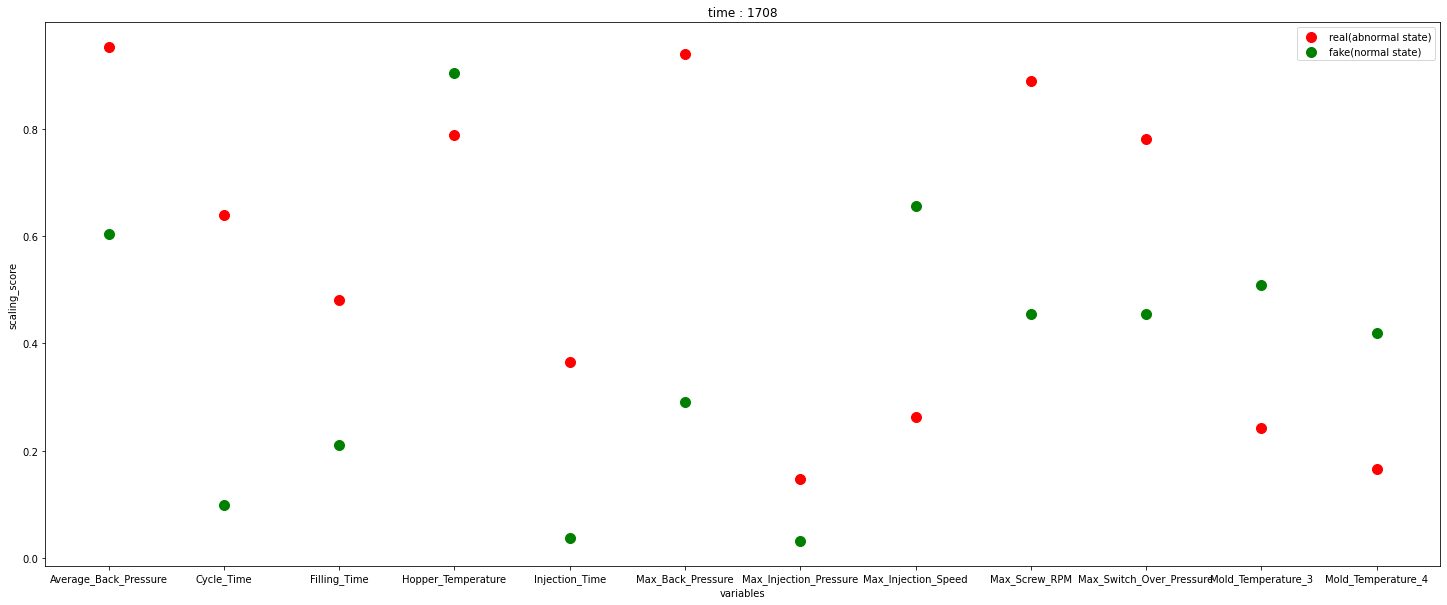


################################# 이상 감지 #################################

time = 1709
Cycle_Time가 정상 범위보다 2.887662272199833 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 1.9236315928884054 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -2.7716787391641446 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 1.9411598396776597 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 5.769825523959298 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 3.8471090544398407 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -10.58329488952267 만큼 벗어났습니다.
Max_Screw_RPM가 정상 범위보다 -0.2098022620498341 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 7.514992512795288 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.7505437391376688 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.838201016076198 만큼 벗어났습니다.


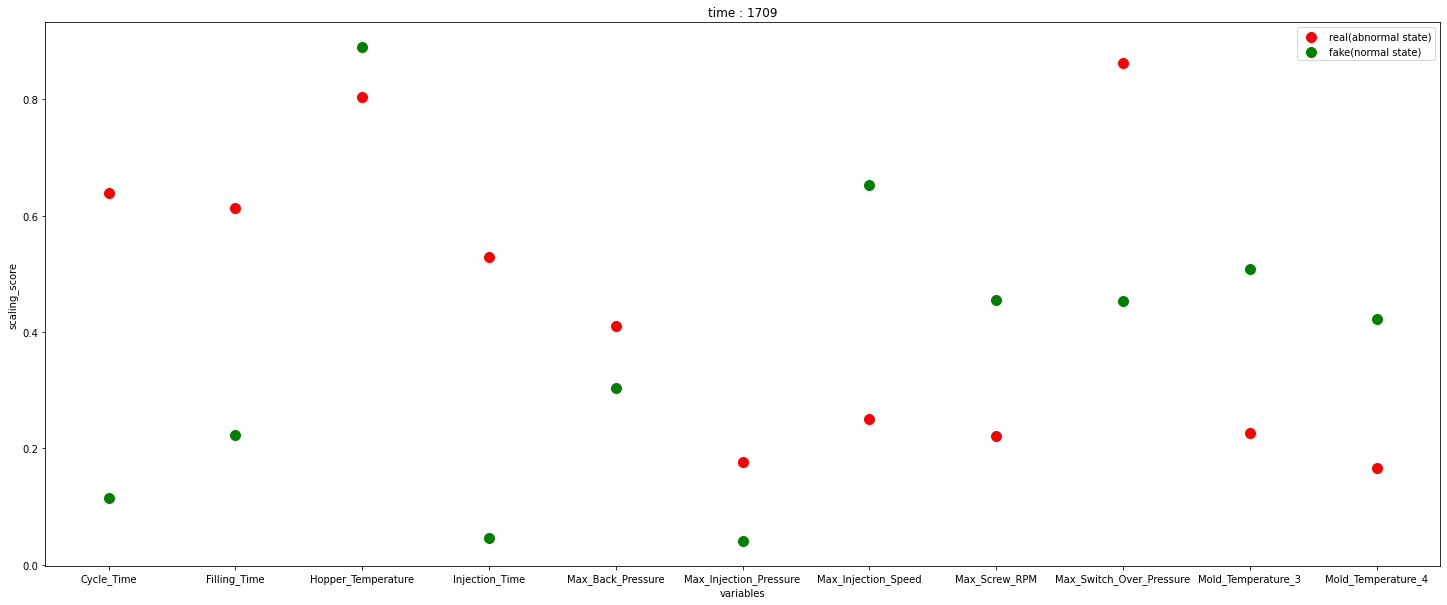


################################# 이상 감지 #################################

time = 1726
Cushion_Position가 정상 범위보다 0.2036569592798969 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 3.848001015068135 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -2.8539376332737447 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 3.856281386742765 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 5.650098772839954 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -17.21125631370068 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 9.995513064598072 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.8538726126536176 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.9307749778786842 만큼 벗어났습니다.


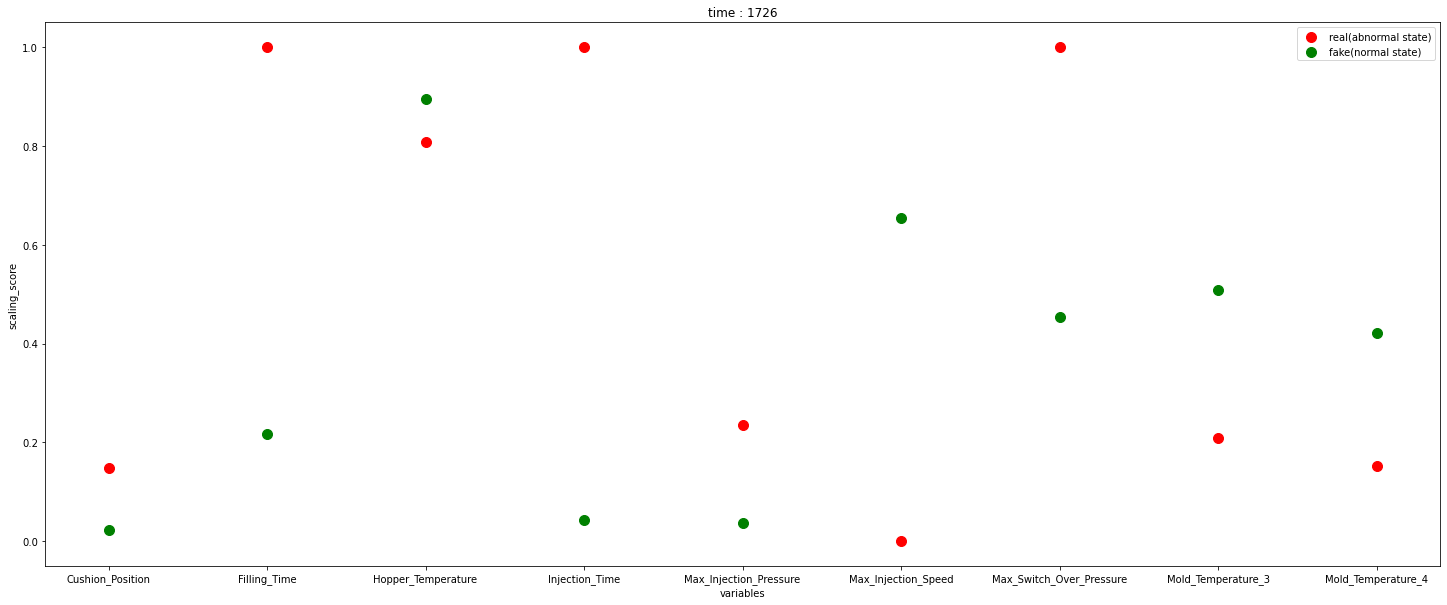


################################# 이상 감지 #################################

time = 1727
Average_Back_Pressure가 정상 범위보다 27.03893493096198 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.9720530894816193 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 1.3367898578300768 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -3.730602426815935 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 1.3183133208962161 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 34.59206318073495 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 3.2987274820208086 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -10.355636704565306 만큼 벗어났습니다.
Max_Screw_RPM가 정상 범위보다 0.3906409896342211 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 5.9634101292199375 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.6598186945864768 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.818253108937995 만큼 벗어났습니다.


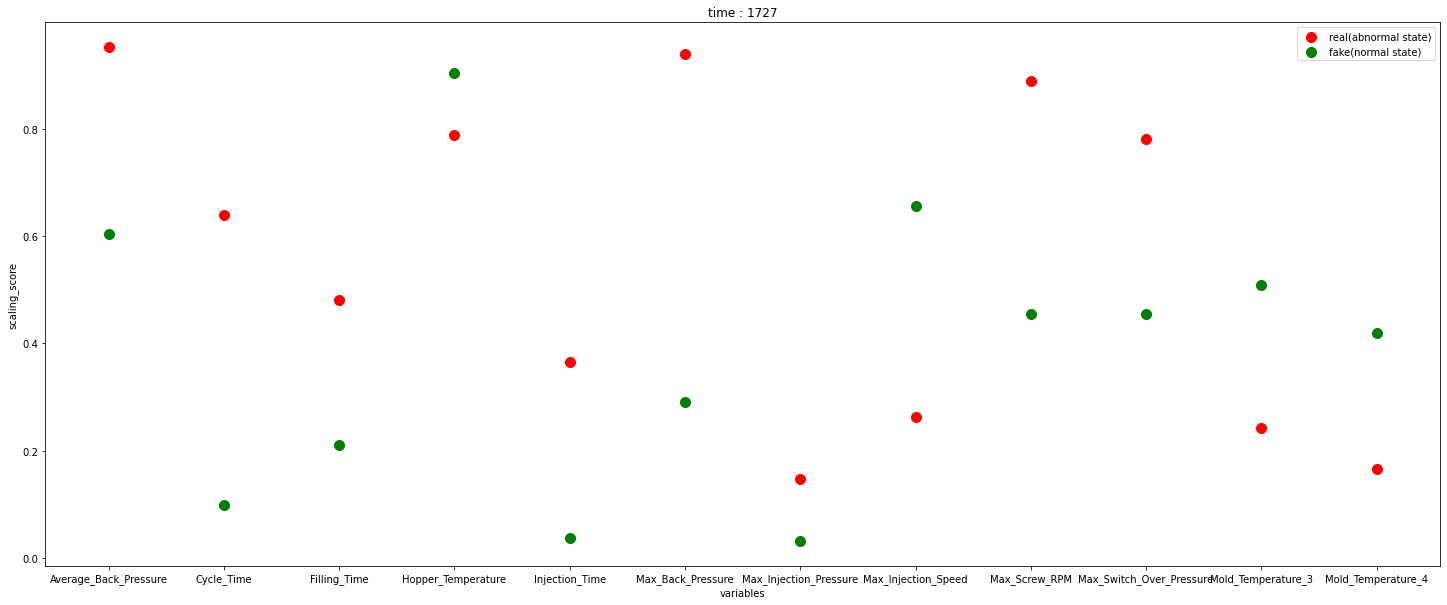


################################# 이상 감지 #################################

time = 1728
Cycle_Time가 정상 범위보다 2.887662272199833 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 1.9236315928884054 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -2.7716787391641446 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 1.9411598396776597 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 5.769825523959298 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 3.8471090544398407 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -10.58329488952267 만큼 벗어났습니다.
Max_Screw_RPM가 정상 범위보다 -0.2098022620498341 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 7.514992512795288 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.7505437391376688 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.838201016076198 만큼 벗어났습니다.


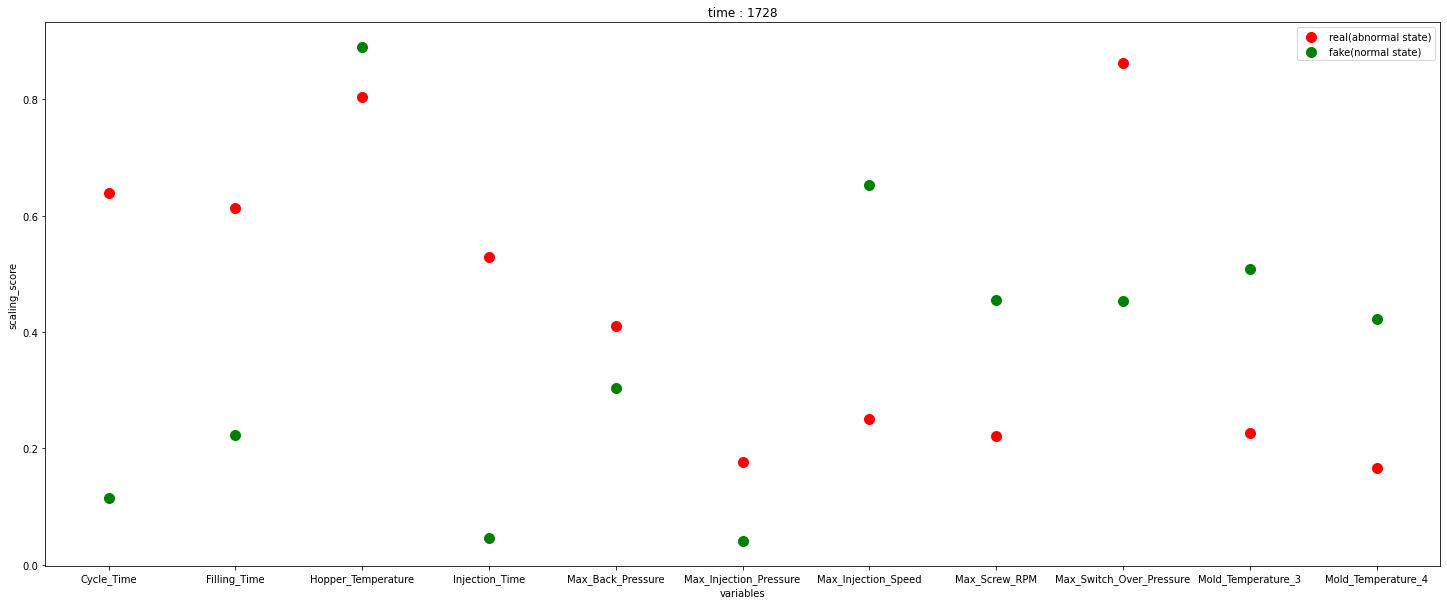


################################# 이상 감지 #################################

time = 1731
Cushion_Position가 정상 범위보다 0.2036569592798969 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 3.848001015068135 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -2.8539376332737447 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 3.856281386742765 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 5.650098772839954 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -17.21125631370068 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 9.995513064598072 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.8538726126536176 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.9307749778786842 만큼 벗어났습니다.


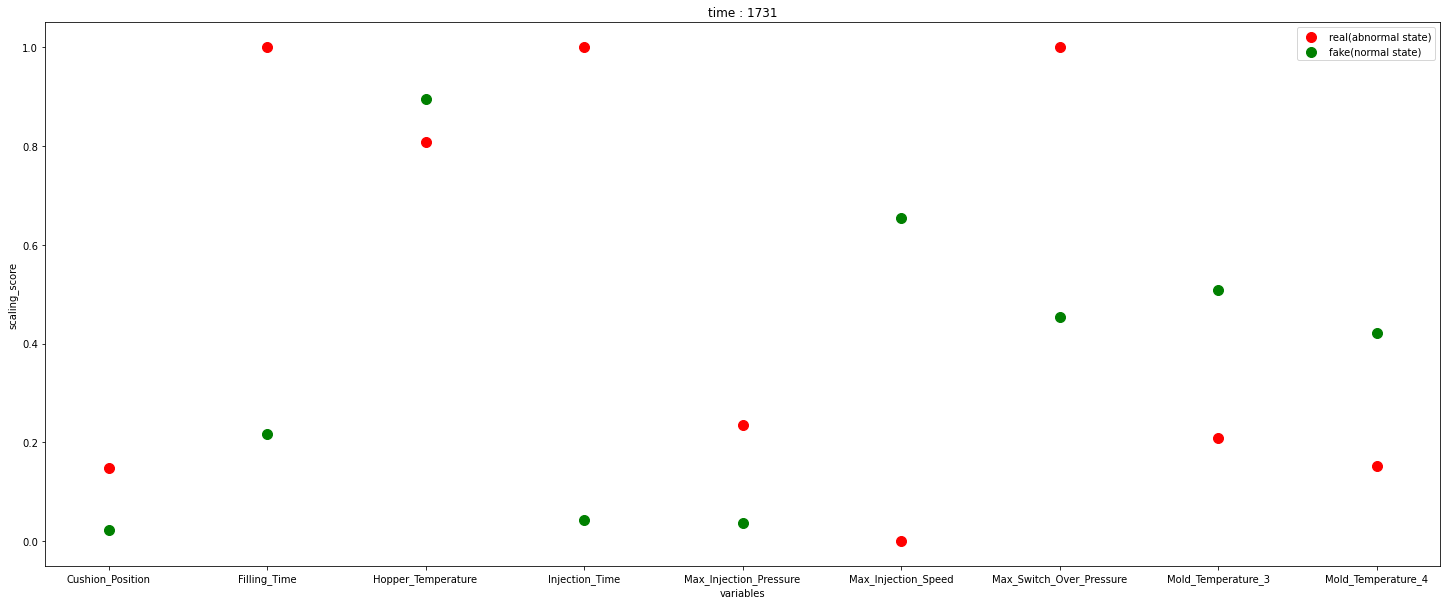


################################# 이상 감지 #################################

time = 1732
Average_Back_Pressure가 정상 범위보다 27.03893493096198 만큼 벗어났습니다.
Cycle_Time가 정상 범위보다 2.9720530894816193 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 1.3367898578300768 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -3.730602426815935 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 1.3183133208962161 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 34.59206318073495 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 3.2987274820208086 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -10.355636704565306 만큼 벗어났습니다.
Max_Screw_RPM가 정상 범위보다 0.3906409896342211 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 5.9634101292199375 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.6598186945864768 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.818253108937995 만큼 벗어났습니다.


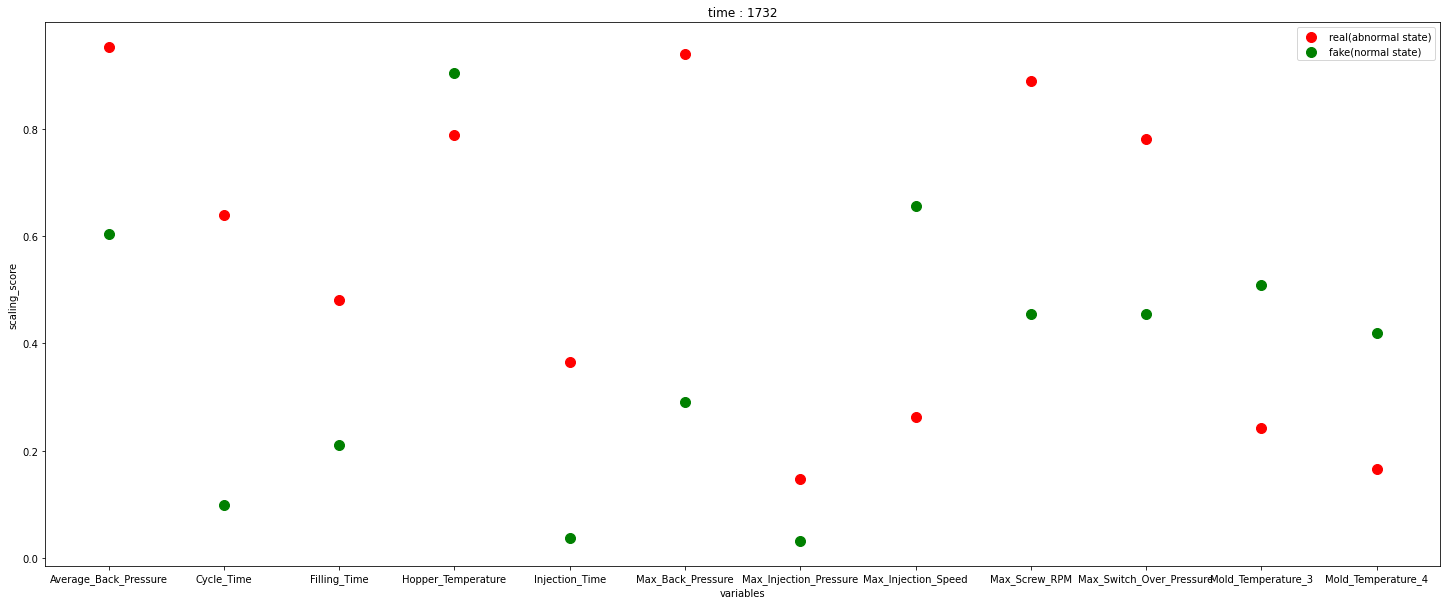


################################# 이상 감지 #################################

time = 1733
Cycle_Time가 정상 범위보다 2.887662272199833 만큼 벗어났습니다.
Filling_Time가 정상 범위보다 1.9236315928884054 만큼 벗어났습니다.
Hopper_Temperature가 정상 범위보다 -2.7716787391641446 만큼 벗어났습니다.
Injection_Time가 정상 범위보다 1.9411598396776597 만큼 벗어났습니다.
Max_Back_Pressure가 정상 범위보다 5.769825523959298 만큼 벗어났습니다.
Max_Injection_Pressure가 정상 범위보다 3.8471090544398407 만큼 벗어났습니다.
Max_Injection_Speed가 정상 범위보다 -10.58329488952267 만큼 벗어났습니다.
Max_Screw_RPM가 정상 범위보다 -0.2098022620498341 만큼 벗어났습니다.
Max_Switch_Over_Pressure가 정상 범위보다 7.514992512795288 만큼 벗어났습니다.
Mold_Temperature_3가 정상 범위보다 -1.7505437391376688 만큼 벗어났습니다.
Mold_Temperature_4가 정상 범위보다 -1.838201016076198 만큼 벗어났습니다.


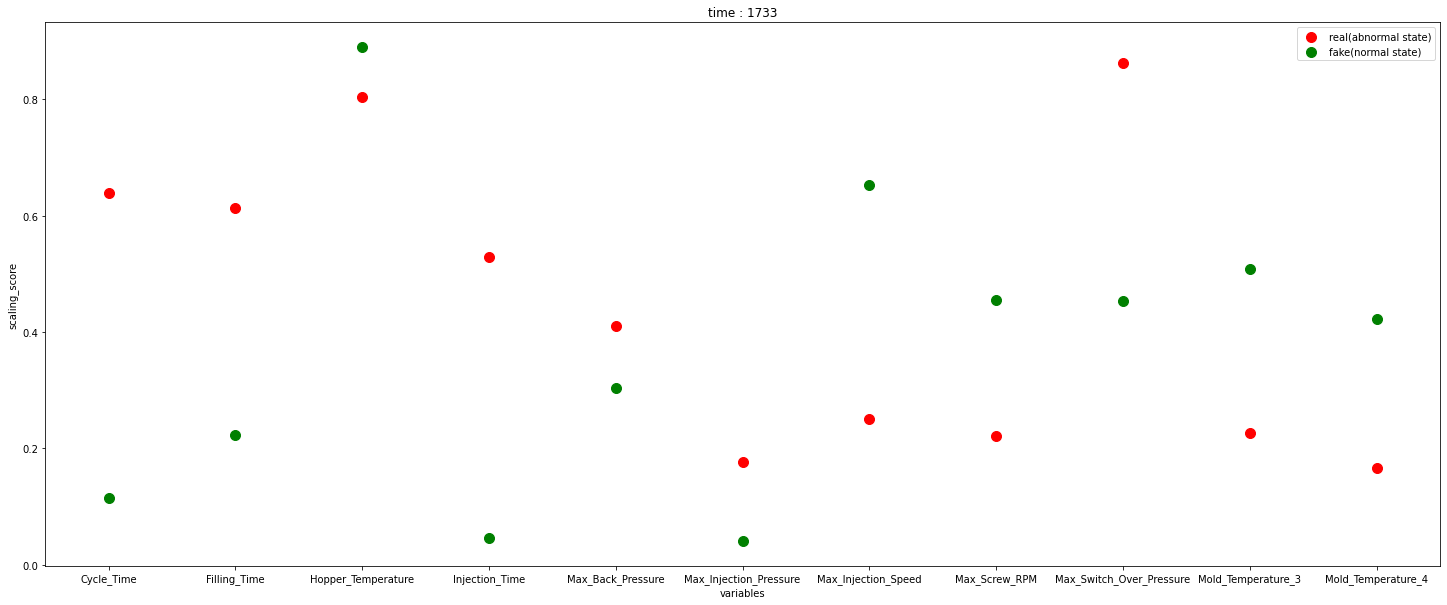

In [12]:
results,outputs=testing(model,test_loader,scaler)